References:

https://drive.google.com/file/d/1STKK4w3wAbHNCkI9idvV5KgFfV6mcH0u/view

https://drive.google.com/file/d/1TDY6d2VvJ2A44Rke35BR3Wh1kx1GbKVj/view

https://learnopencv.com/contour-detection-using-opencv-python-c/

https://byjus.com/maths/angle-between-two-lines/

https://www.geeksforgeeks.org/python-opencv-cv2-line-method/

https://stackoverflow.com/questions/18632276/how-to-draw-a-line-on-an-image-in-opencv?rq=1

https://www.programcreek.com/python/example/84098/cv2.line

https://stackoverflow.com/questions/28260962/calculating-angles-between-line-segments-python-with-math-atan2

Importing our required libraries

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

Reading our images and converting to grayscale

In [50]:
path = 'C:\Danyal\Work\FAST\Semester 5\Digital Image Processing\i192014_DanyalFaheem_19_A3\`data\img1.png'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img_colour = cv2.imread(path, cv2.IMREAD_COLOR)

Calculating the centers of the objects and connecting them with lines

3





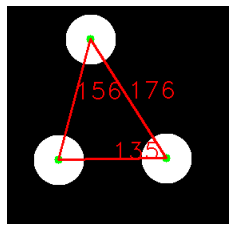

In [51]:
#Thresholding our image to convert to binary
threshold, bw = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)  
#Reading our image
path = 'C:\Danyal\Work\FAST\Semester 5\Digital Image Processing\i192014_DanyalFaheem_19_A3\`data\img1.png'
img_colour = cv2.imread(path, cv2.IMREAD_COLOR)
#Finding the external contours of the image
contours, hierarchy = cv2.findContours(bw,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
#Intializing a list for later use
points = []
#Looping through all the contours
for i in range(len(contours)):
    #Finding the moments of each contour
    M = cv2.moments(contours[i])
    #Finding the centers of each contour
    x = int(M["m10"] / M["m00"])
    y = int(M["m01"] / M["m00"])
    #Drawing a circle on each center of object
    cv2.circle(img_colour, (x, y), 5, (0, 255, 0), -1)
    #Appending the x and y axis for later user
    points.append((x,y))
temp = img_colour.copy()
# print (points)
distances = []
#Looping through the x,y points of the centers
for i in points:
    for y in points:
        if i != y:
            #Draw line between the two centers
            cv2.line(img_colour, i, y, (255, 0, 0), 2)
            #If distance of line already not printed, write it on image
            if (int(np.sqrt((y[0] - i[0])**2 + (y[1] - i[1])**2))) in distances:
                print("")
            else:
                #Calculating midpoints of lines to print length there
                index = (int((i[0] + y[0]) / 2) , int((i[1] + y[1]) / 2) )
                #Appending the line drawn so that it is not redrawn
                distances.append(int(np.sqrt((y[0] - i[0])**2 + (y[1] - i[1])**2)))
                #Printing the length of the lines calculated by the ((y2 - y1)^2  + (x2 - x1)^2)^0.5 formular
                cv2.putText(img_colour, str((int(np.sqrt((y[0] - i[0])**2 + (y[1] - i[1])**2)))), (index),  2, 1, (255,0,0))
plt.imshow(img_colour)
plt.axis('off')
plt.show()

Now calculating the angles in between the lines

47.35783695963305
[(104, 41), (64, 192)] [(104, 41), (199, 190)]
58.32783607348122
[(104, 41), (199, 190)] [(64, 192), (199, 190)]
74
[(64, 192), (104, 41)] [(64, 192), (199, 190)]


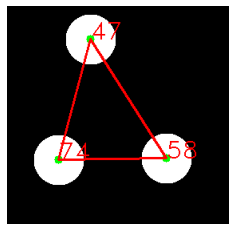

In [52]:
#Code for angles calculation acquired from: 
#https://stackoverflow.com/questions/28260962/calculating-angles-between-line-segments-python-with-math-atan2
def dot(vA, vB):
    return vA[0]*vB[0]+vA[1]*vB[1]

def ang(lineA, lineB):
    # Get nicer vector form
    vA = [(lineA[0][0]-lineA[1][0]), (lineA[0][1]-lineA[1][1])]
    vB = [(lineB[0][0]-lineB[1][0]), (lineB[0][1]-lineB[1][1])]
    # Get dot prod
    dot_prod = dot(vA, vB)
    # Get magnitudes
    magA = dot(vA, vA)**0.5
    magB = dot(vB, vB)**0.5
    # Get cosine value
    cos_ = dot_prod/magA/magB
    # Get angle in radians and then convert to degrees
    angle = math.acos(dot_prod/magB/magA)
    # Basically doing angle <- angle mod 360
    ang_deg = math.degrees(angle) % 360

    if ang_deg-180 >= 0:
        # As in if statement
        return 360 - ang_deg
    else:

        return ang_deg
#Traversing the list of points to draw lines
for i in points:
    for y in points:
        if i != y:
            #Draw line between the two centers
            cv2.line(temp, i, y, (255, 0, 0), 2)


#Create lines segments using the center of points
line1 = [points[0], points[1]]
line2 = [points[2], points[0]]
line3 = [points[2], points[1]]
line4 = [points[0], points[2]]

print(ang(line2, line3))
print(line2, line3)
print(ang(line1, line3))
print(line3, line1)
print(int(ang(line4, line1)))
print(line4, line1)

#Calculate angles using the formulas provided
#Write angles on the image
cv2.putText(temp, str(int(ang(line2, line3))), (line2[0]),  2, 1, 255)
cv2.putText(temp, str(int(ang(line1, line3))), (line1[1]),  2, 1, 255)
cv2.putText(temp, str(int(ang(line4, line1))), (line4[0]),  2, 1, 255)

plt.imshow(temp)
plt.axis('off')
plt.show()